In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import f_oneway

In [95]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [96]:
data = pd.read_csv('../data/base.csv')

In [97]:
data

numero_solicitacao             razaoSocial          nomeFantasia  \
0                      1  James Richardson-Patel    Alexandra Williams   
1                      2      Dr. Geoffrey Walsh     Mr. Darren Arnold   
2                      3           Joanna Hudson        Dr. David Rees   
3                      4    Gordon Jones-Hopkins      Sara Reid-Robson   
4                      5               Nigel Lee    Dr. Stanley Duncan   
...                  ...                     ...                   ...   
8968                9041           Leah Williams         Georgia Booth   
8969                9042      Mr. Jordan Stevens      Miss Ellie Kelly   
8970                9043         Mr. Barry Wells       Danielle Hudson   
8971                9044             Keith Jones  Steven Kennedy-Jones   
8972                9045          Cheryl Johnson  Chelsea Kay-Sinclair   

            cnpjSemTraco  maiorAtraso  margemBrutaAcumulada  \
0     KEBE17609492220843            0              0.252448   
1     JRBK88908250677300            0              0.000000   
2     GCVQ28531614261293            4              0.624777   
3     KJND32266018316396           20              0.000000   
4     CGQN15826802440348           20              0.454088   
...                  ...          ...                   ...   
8968  YKGZ02907098931653          149              0.306580   
8969  UCBM91111020900951           23              0.329796   
8970  CLDB61185288622179            3              0.383919   
8971  BRJP37453437154592           11              0.424099   
8972  COZD54939108010752            4              0.365041   

      percentualProtestos       primeiraCompra  prazoMedioRecebimentoVendas  \
0                     0.0  2015-12-10T00:00:00                            0   
1                     NaN  2019-06-12T17:28:31                            0   
2                     0.0  2019-11-27T00:00:00                            0   
3                     NaN  2017-02-13T17:20:27                            0   
4                     0.0  2010-07-13T00:00:00                           20   
...                   ...                  ...                          ...   
8968                  0.0  2006-04-26T00:00:00                           59   
8969                  0.0  2016-08-03T00:00:00                            0   
8970                  0.0  2018-10-25T00:00:00                            4   
8971                  0.0  2011-08-10T00:00:00                           31   
8972                  0.0  2009-05-27T00:00:00                           56   

      titulosEmAberto  valorSolicitado                 status  \
0                0.00          50000.0       AprovadoAnalista   
1                0.00          10000.0  DocumentacaoReprovada   
2                0.00          20000.0       AprovadoAnalista   
3                0.00          25000.0       AprovadoAnalista   
4             1486.95          50000.0       AprovadoAnalista   
...               ...              ...                    ...   
8968        599964.04         900000.0  EmAnaliseDocumentacao   
8969             0.00         150000.0  EmAnaliseDocumentacao   
8970          2933.38         150000.0  EmAnaliseDocumentacao   
8971        559679.98        1290000.0  EmAnaliseDocumentacao   
8972         13640.01          50000.0  EmAnaliseDocumentacao   

                 definicaoRisco  diferencaPercentualRisco  percentualRisco  \
0          De 11 a 30 % - Baixo                  0.716981         0.283019   
1     De 0 a 10 % - Muito Baixo                  1.000000         0.000000   
2          De 11 a 30 % - Baixo                  0.716981         0.283019   
3           De 51 a 80 % - Alto                  0.396226         0.603774   
4          De 11 a 30 % - Baixo                  0.830189         0.169811   
...                         ...                       ...              ...   
8968  De 0 a 10 % - Muito Baixo                  1.000000         0.000000   
8969  

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [99]:
data.duplicated().sum()

0

### **Checking/Droping and giving weight to features + Hyphotesis test**

In [100]:
# isnull().sum() doesn't show all the columns of the dataframe

nullvalues = data.isnull().sum()
print(nullvalues.to_string())

numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
margemBruta                 

In [101]:
cols = ['empresa_MeEppMei','intervaloFundacao','restricoes']

is_null = data[cols].isnull().all(axis=1)

data1 = data[is_null] #745 rows

In [102]:
data.drop([
  'numero_solicitacao',
  'razaoSocial',
  'nomeFantasia',
  'cnpjSemTraco',
  'dataAprovadoEmComite',
  'dataAprovadoNivelAnalista',
  'primeiraCompra',
  'periodoBalanco'
], axis=1, inplace=True)

In [103]:
data = data.drop(data[data['status'] == 'AguardandoAprovacao'].index)
data = data.dropna(subset=['empresa_MeEppMei'])
data = data.dropna(subset=['valorAprovado'])

In [104]:
num_data = data._get_numeric_data().columns.tolist()
cat_data = set(data.columns) - set(num_data)

In [105]:
for i in cat_data:
    print(data[i].value_counts())

Acima de 17 anos    2544
De 0 a 5 anos       1941
De 6 a 10 anos      1631
De 11 a 16 anos     1453
Name: intervaloFundacao, dtype: int64
AprovadoAnalista    7011
AprovadoComite       558
Name: status, dtype: int64
False    4675
True     2894
Name: empresa_MeEppMei, dtype: int64
De 11 a 30 % - Baixo         4237
De 31 a 50 % - Médio         2225
De 0 a 10 % - Muito Baixo     822
De 51 a 80 % - Alto           285
Name: definicaoRisco, dtype: int64
False    7095
True      474
Name: restricoes, dtype: int64


In [106]:
# giving weight to some categorical features
# dict to transform the features
st = {"ReprovadoComite": 1, "ReprovadoAnalista": 2, "DocumentacaoReprovada": 3, "EmAnaliseDocumentacao": 4, "AprovadoComite": 5, "AprovadoAnalista": 6}
dr = {"De 0 a 10 % - Muito Baixo": 1, "De 11 a 30 % - Baixo": 2, "De 31 a 50 % - Médio": 3, "De 51 a 80 % - Alto": 4}

# replace categorical value
data['status'] = data['status'].replace(st).astype(int)
data['definicaoRisco'] = data['definicaoRisco'].replace(dr).astype(int)

In [107]:
data['empresa_MeEppMei'] = data['empresa_MeEppMei'].astype(int)
data['restricoes'] = data['restricoes'].astype(int)

In [108]:
one_hot = pd.get_dummies(data['intervaloFundacao'])
one_hot

data = pd.concat([data, one_hot], axis=1)
data.drop('intervaloFundacao', axis=1, inplace=True)

##### **Hyphotesis test on percentualProtestos**

In [109]:
# teste anova apenas com distribuição normal
# teste de hipótese ANOVA na coluna percentualProtestos

x = data['percentualProtestos']
y = data['valorAprovado']

# Realização do teste ANOVA
f_value, p_value = f_oneway(x, y)

# Verificação do resultado do teste
if p_value < 0.05:
    print('Rejeita H0. Há evidência de diferença significativa entre as médias.')
else:
    print('Não rejeita H0. Não há evidência de diferença significativa entre as médias.')

Não rejeita H0. Não há evidência de diferença significativa entre as médias.


In [110]:
data.drop('percentualProtestos', axis=1, inplace=True)

### **Outliers**

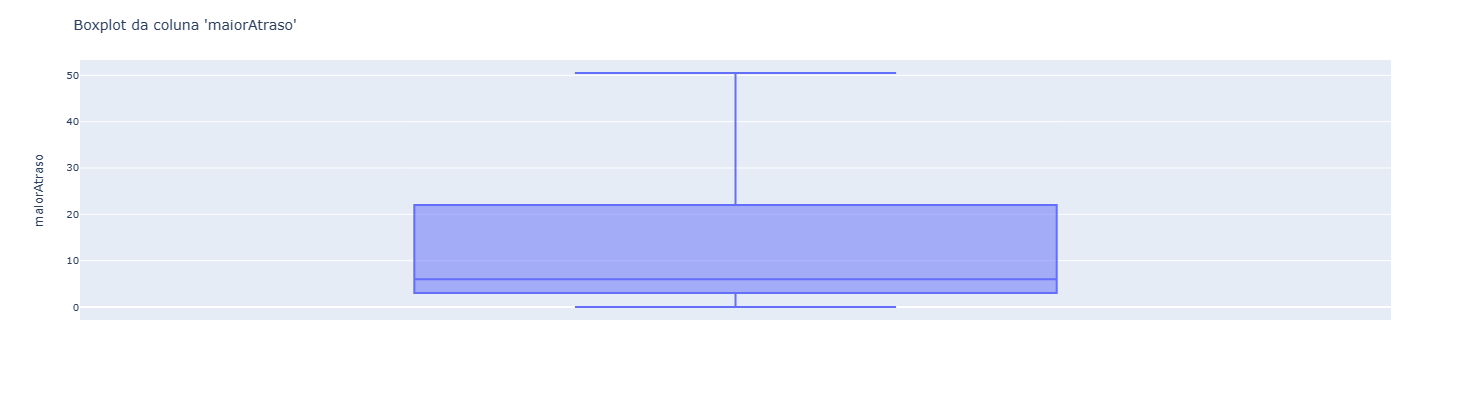

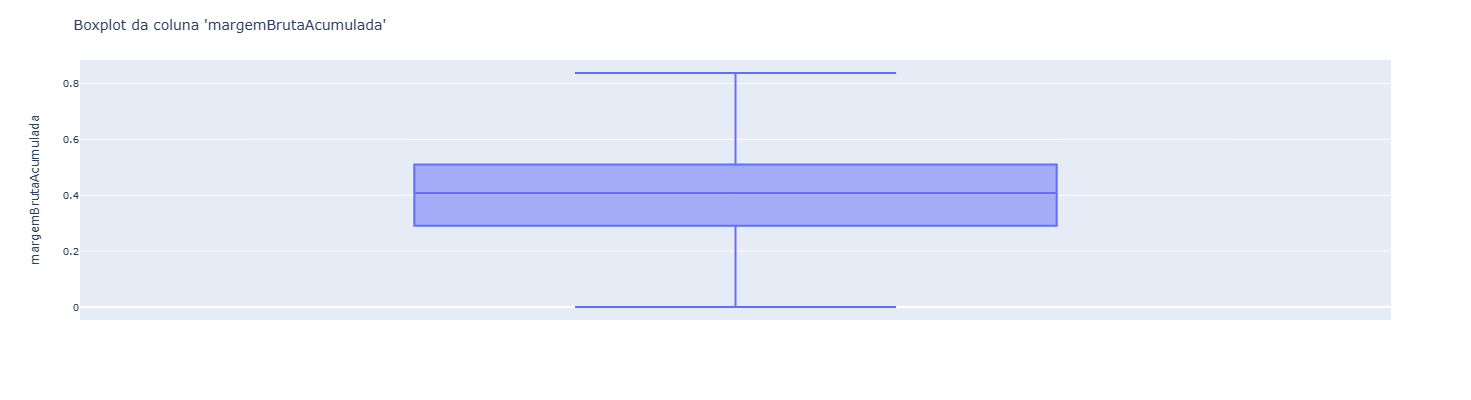

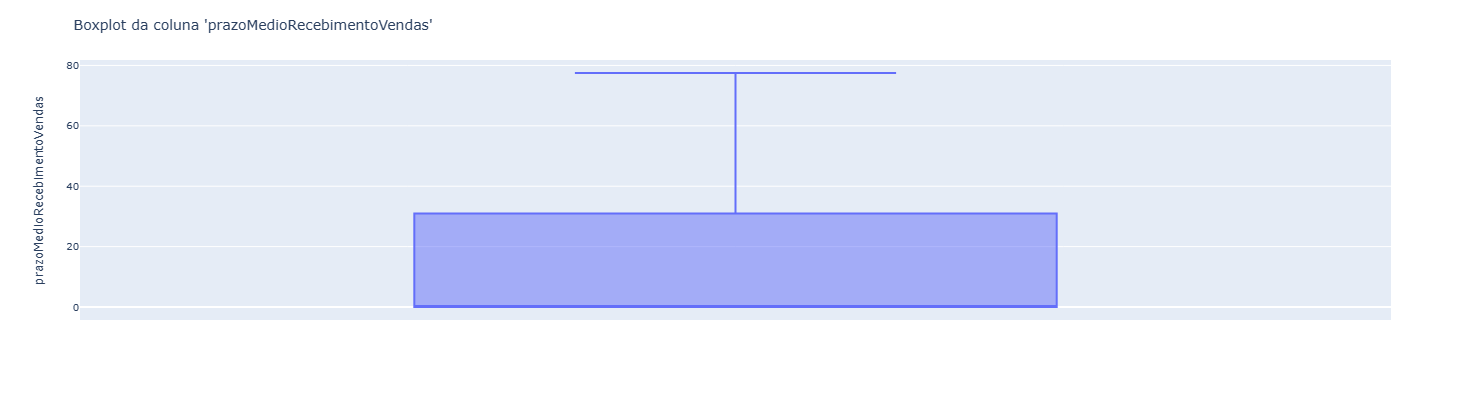

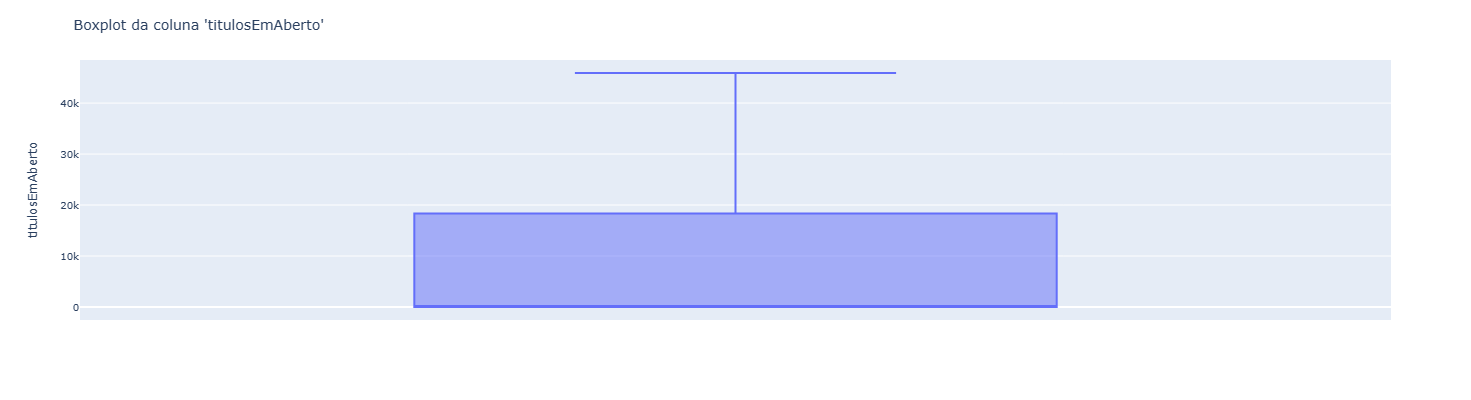

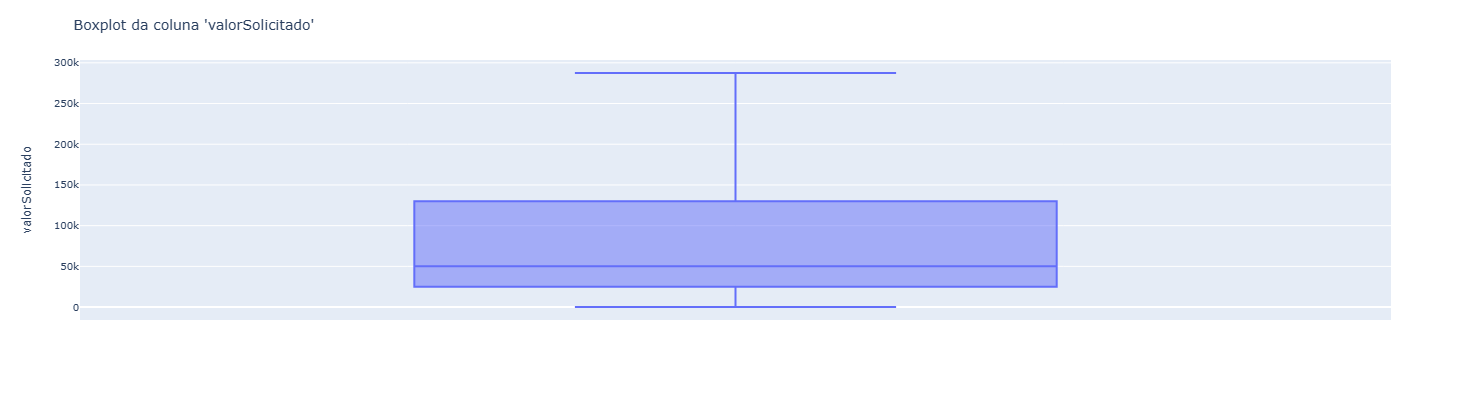

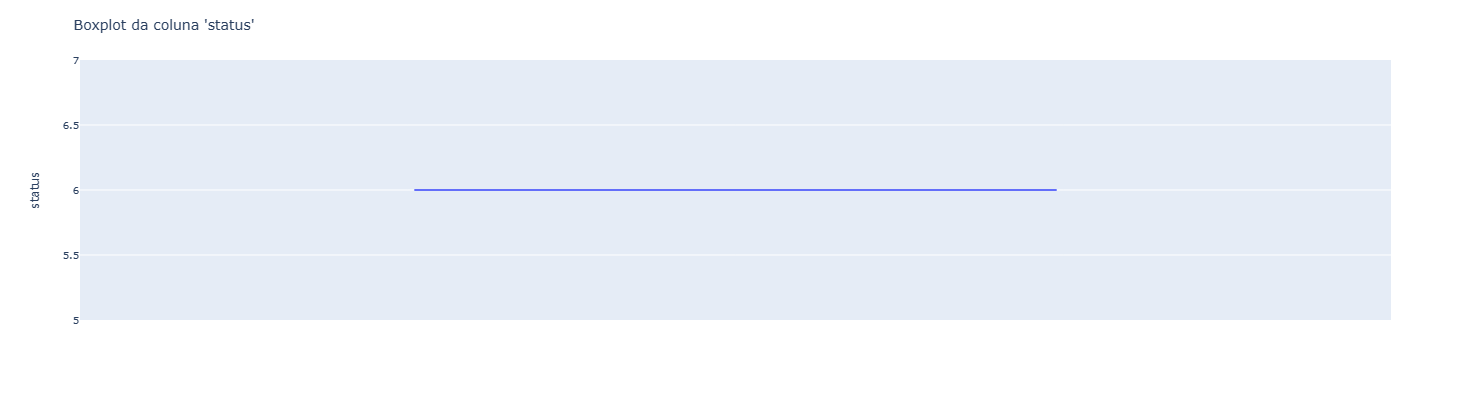

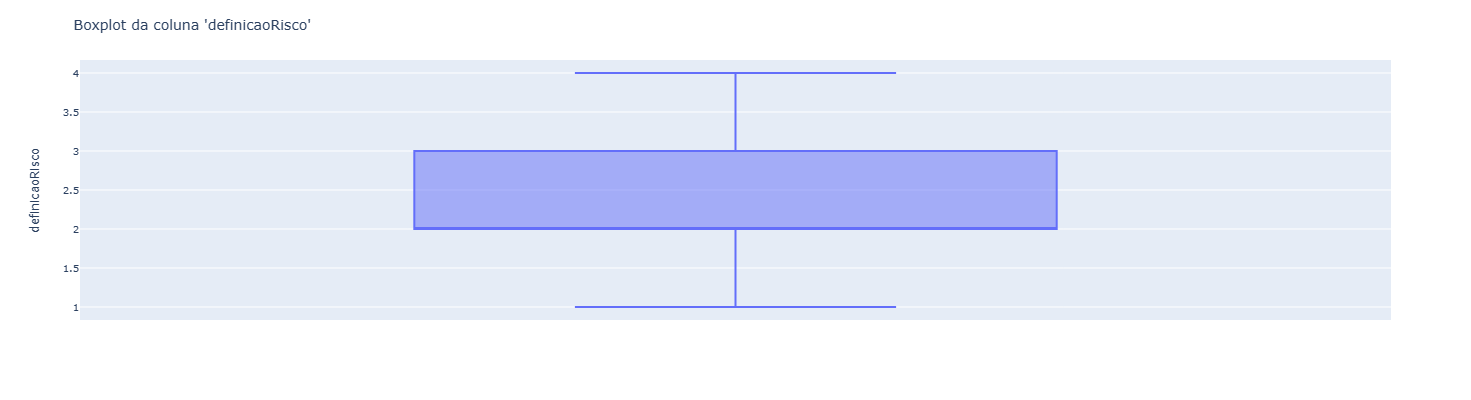

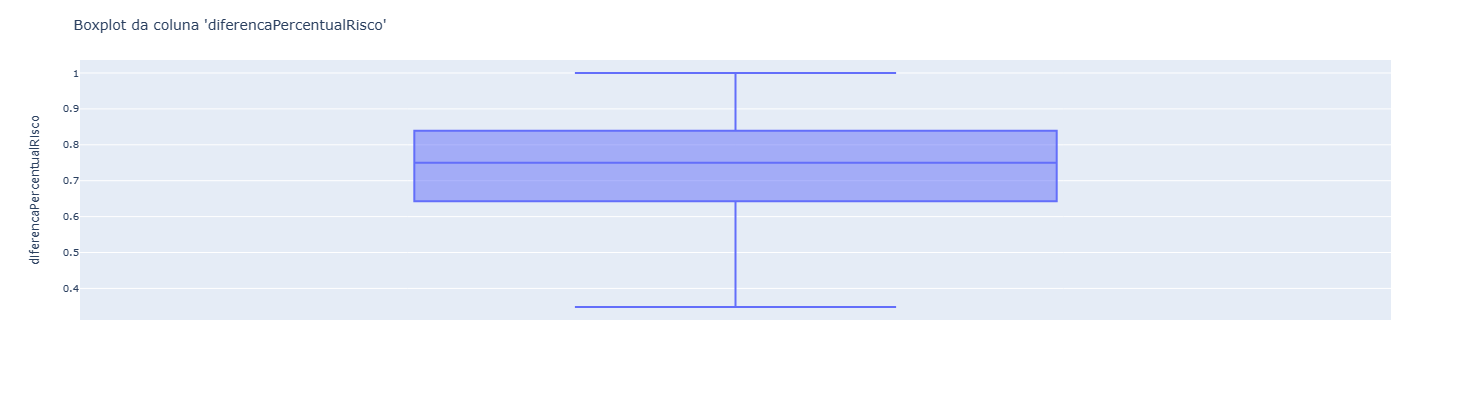

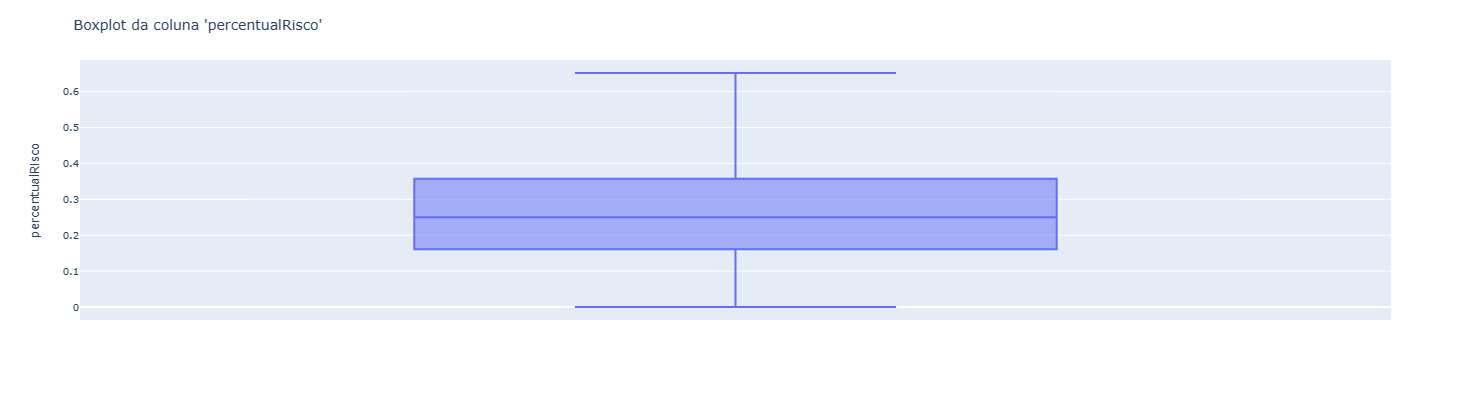

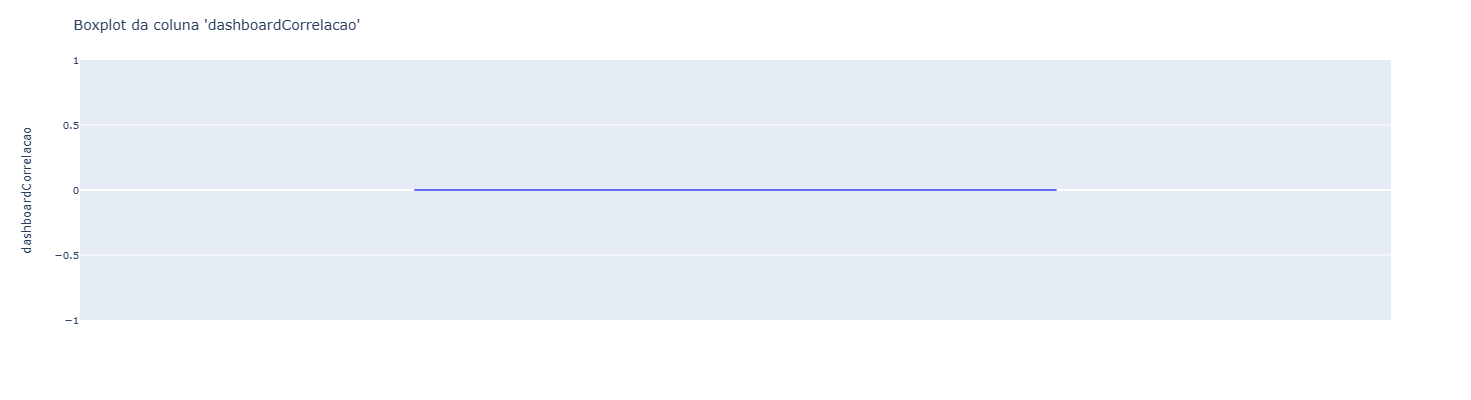

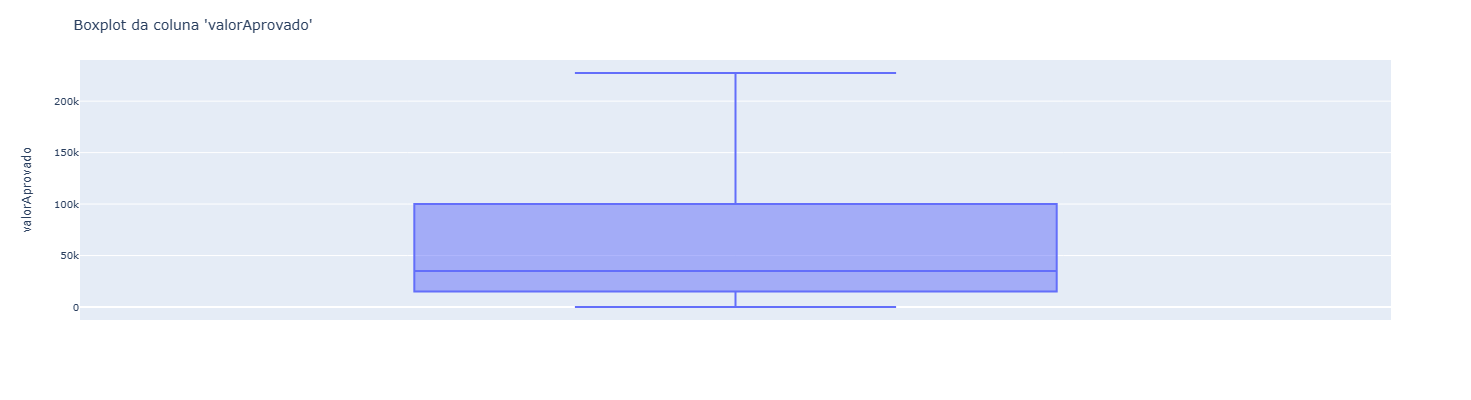

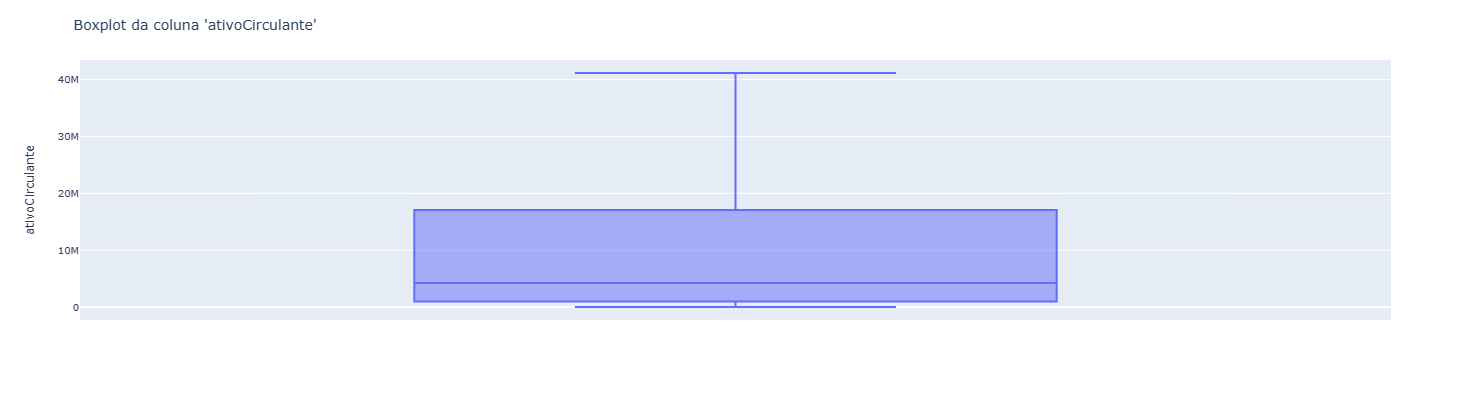

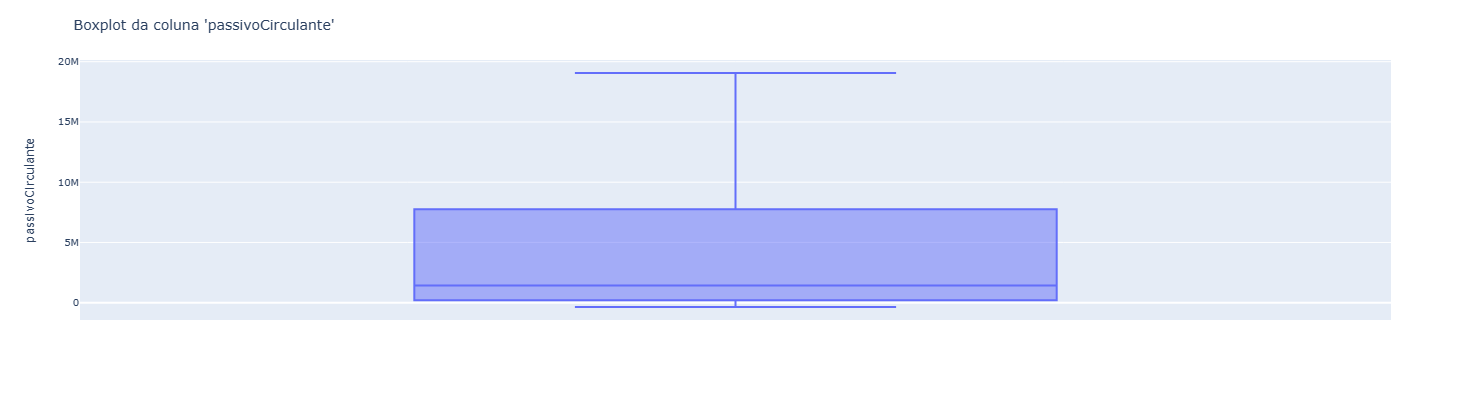

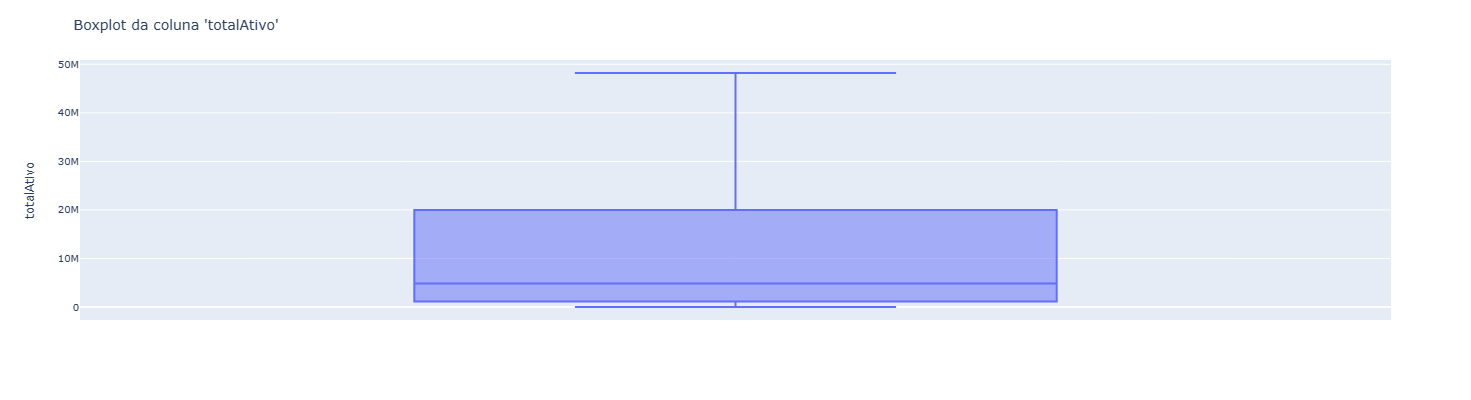

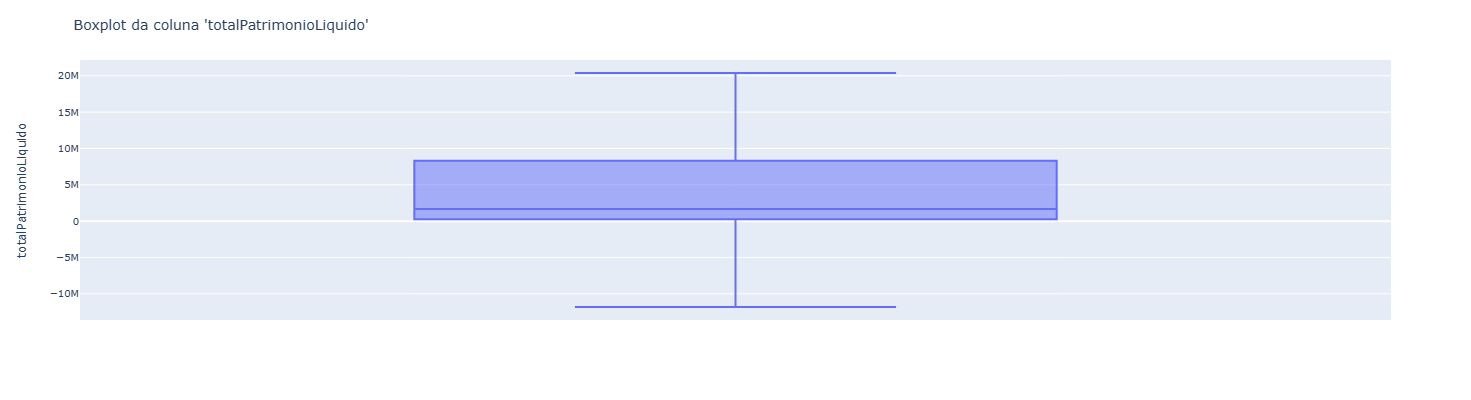

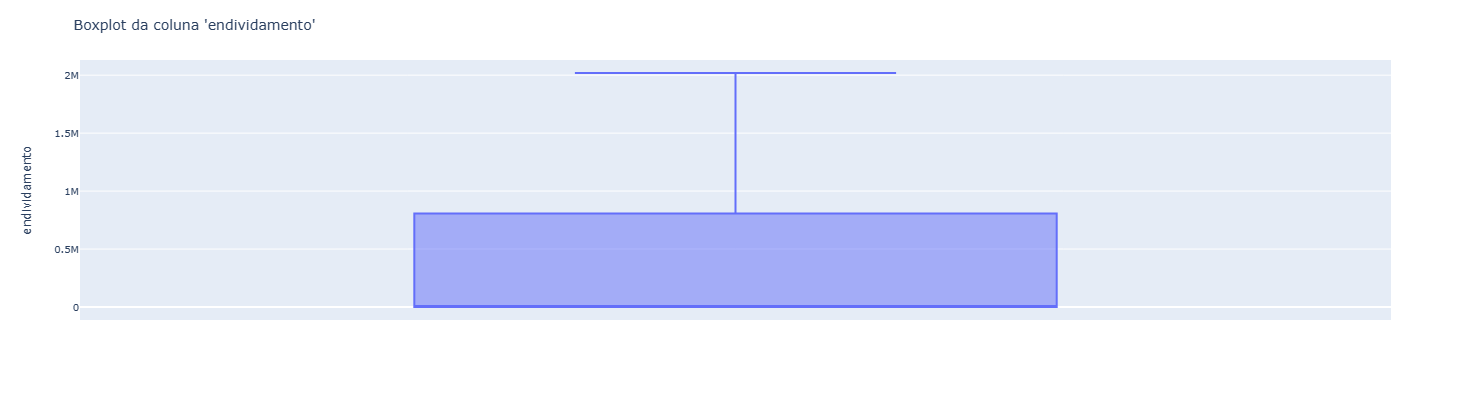

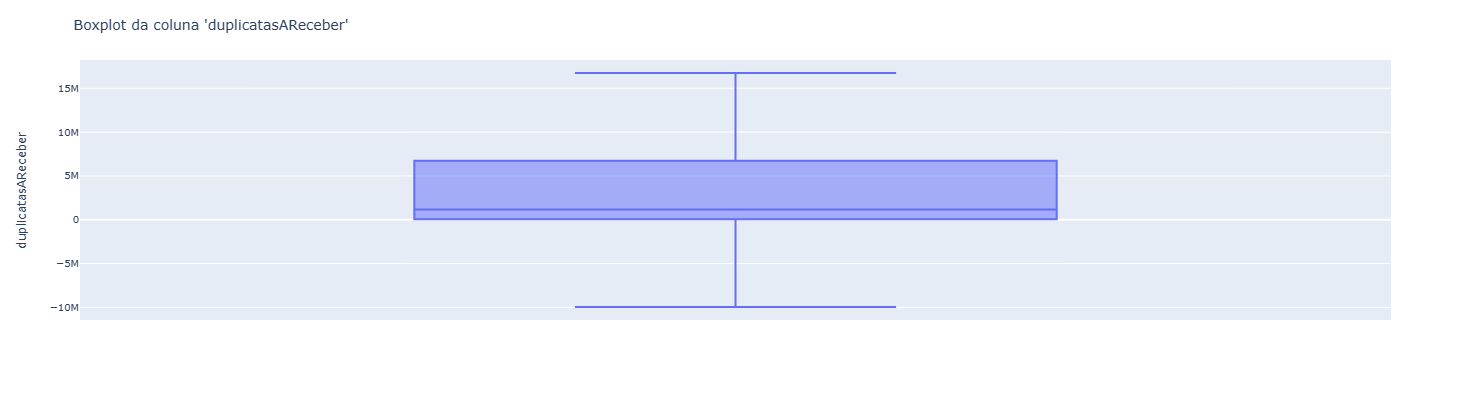

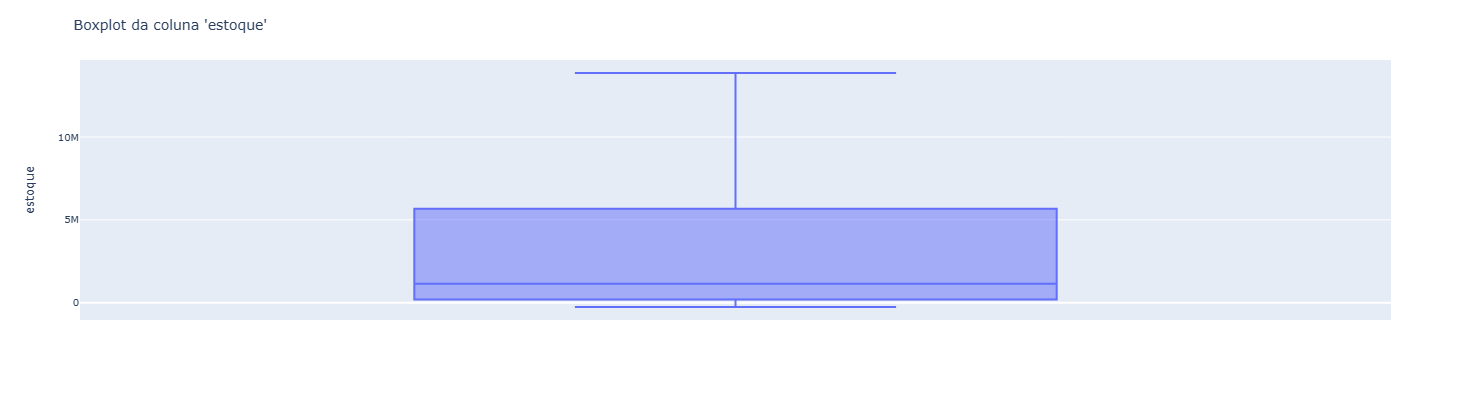

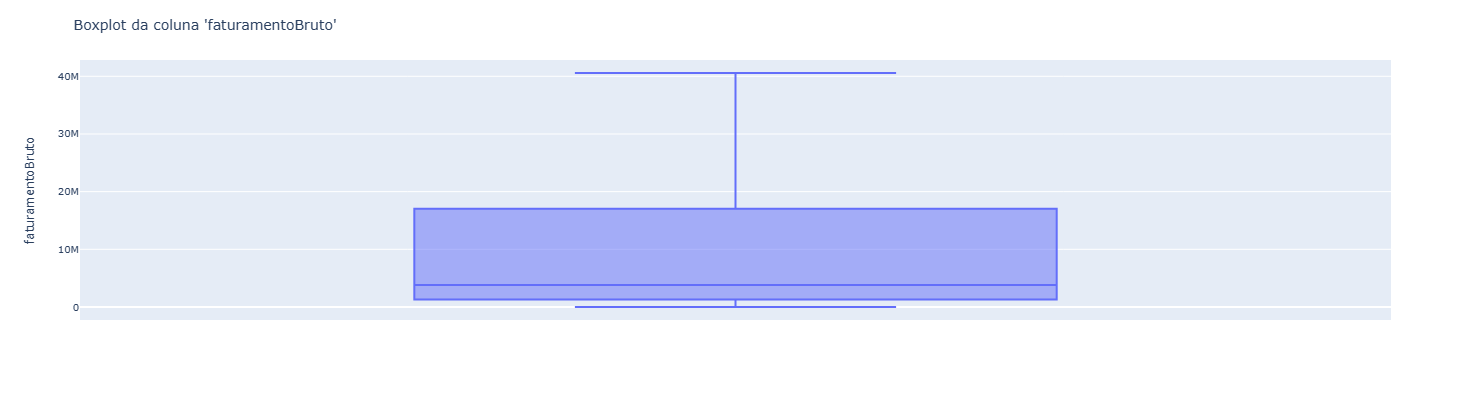

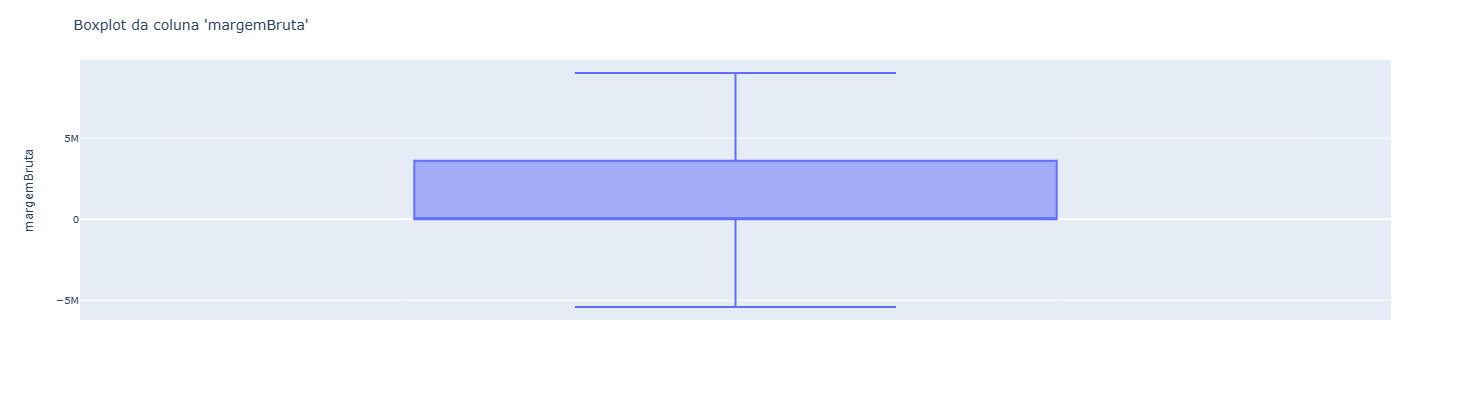

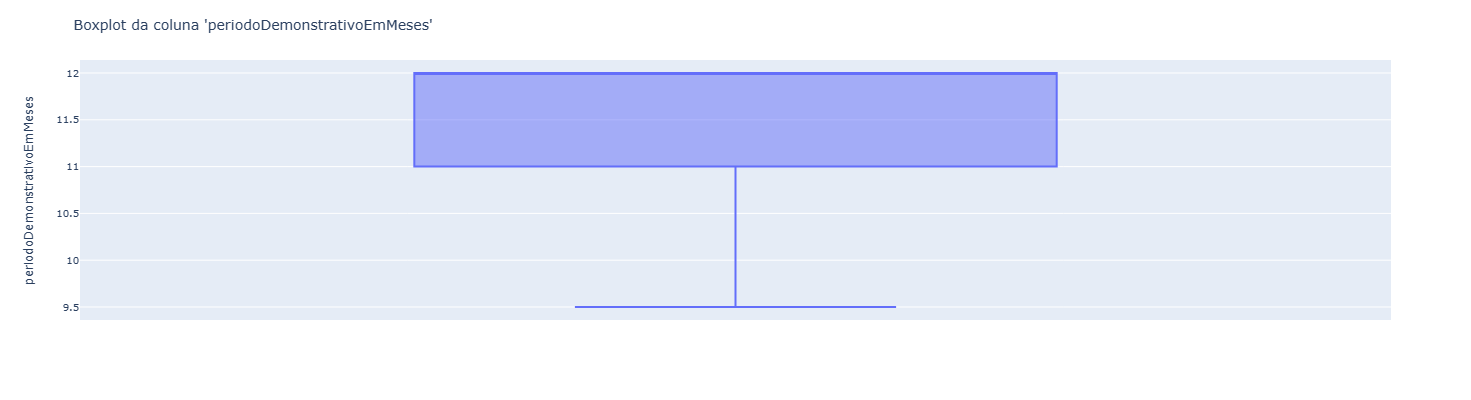

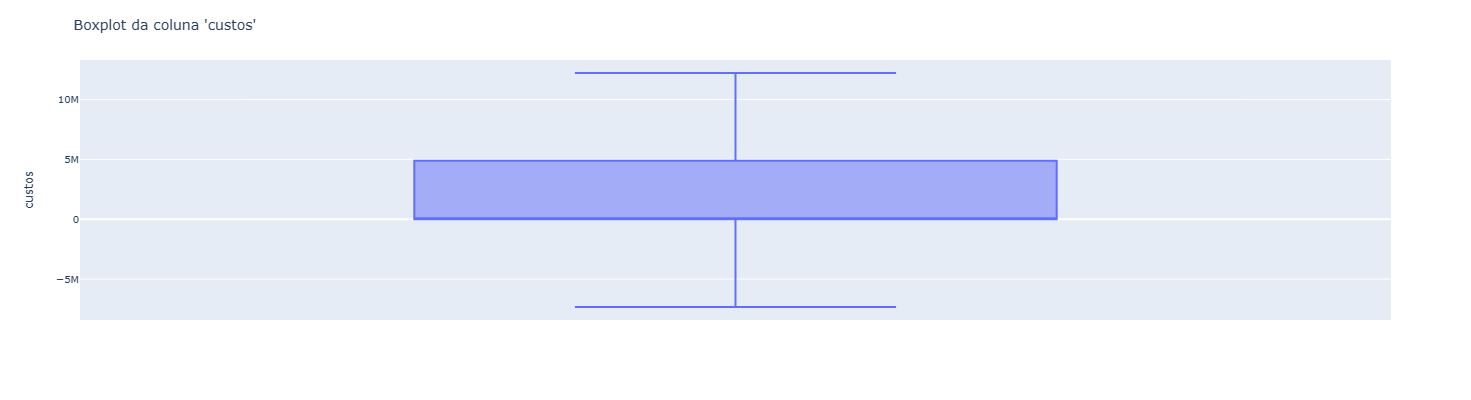

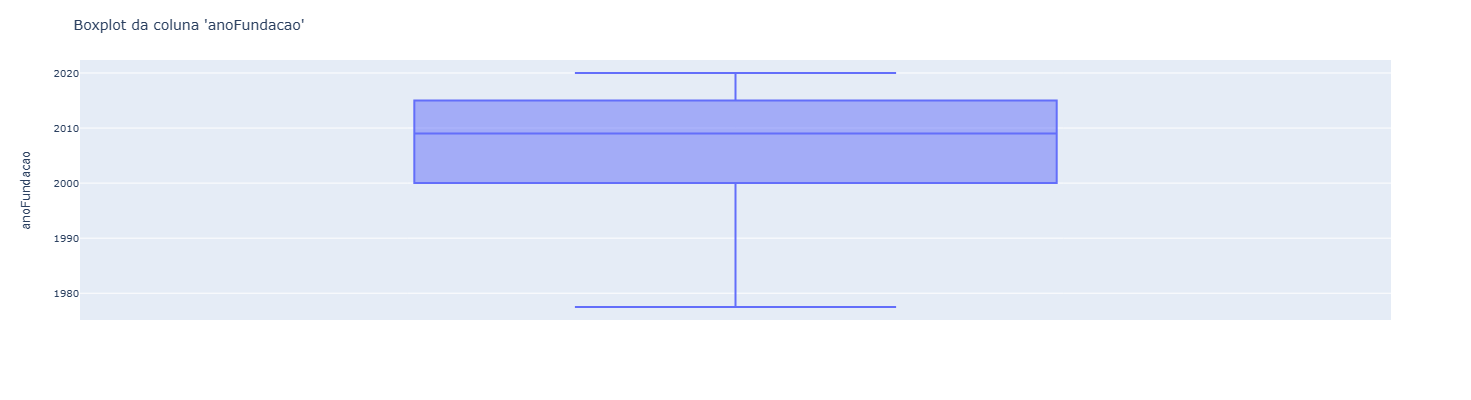

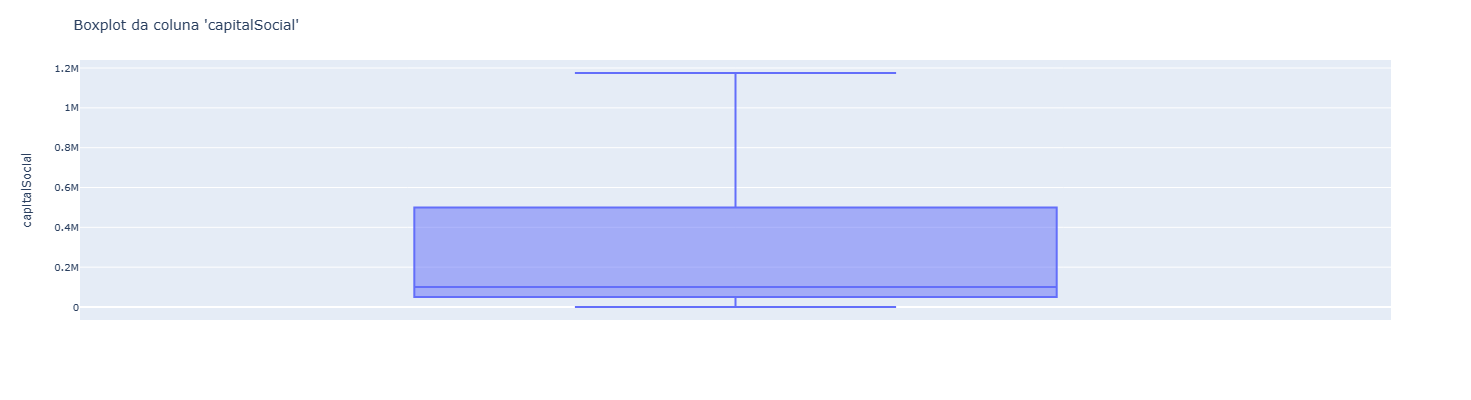

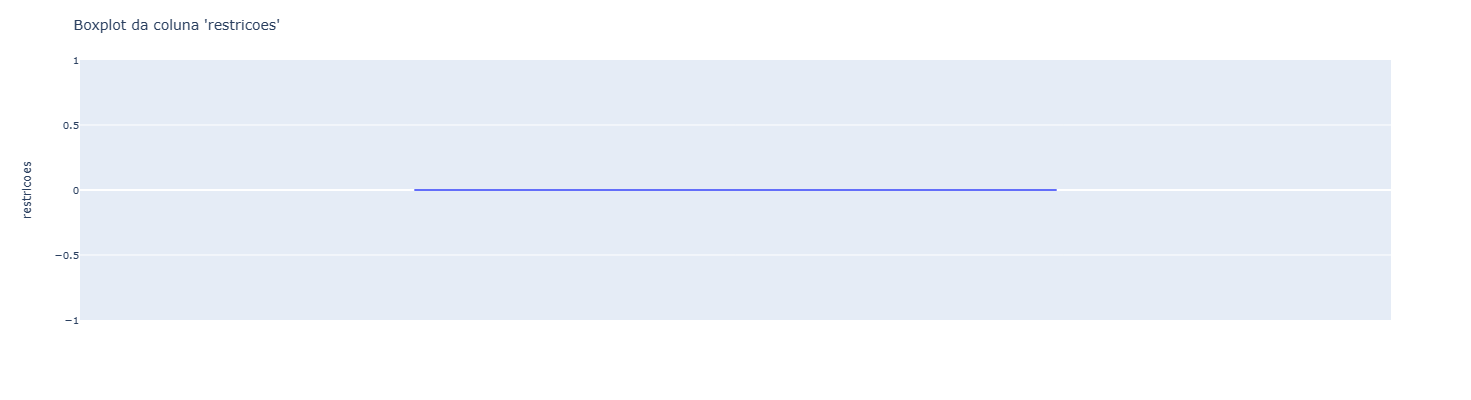

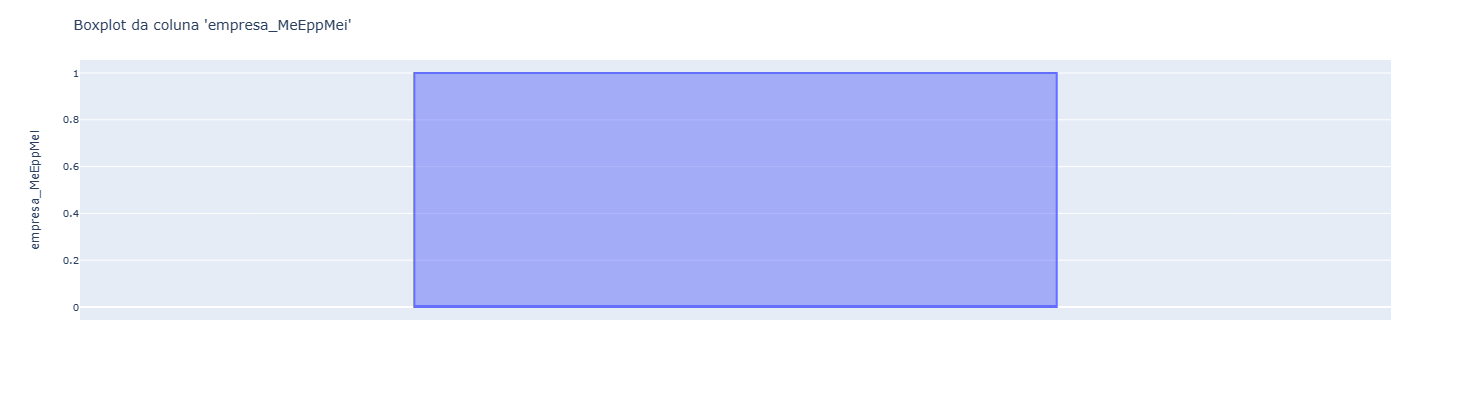

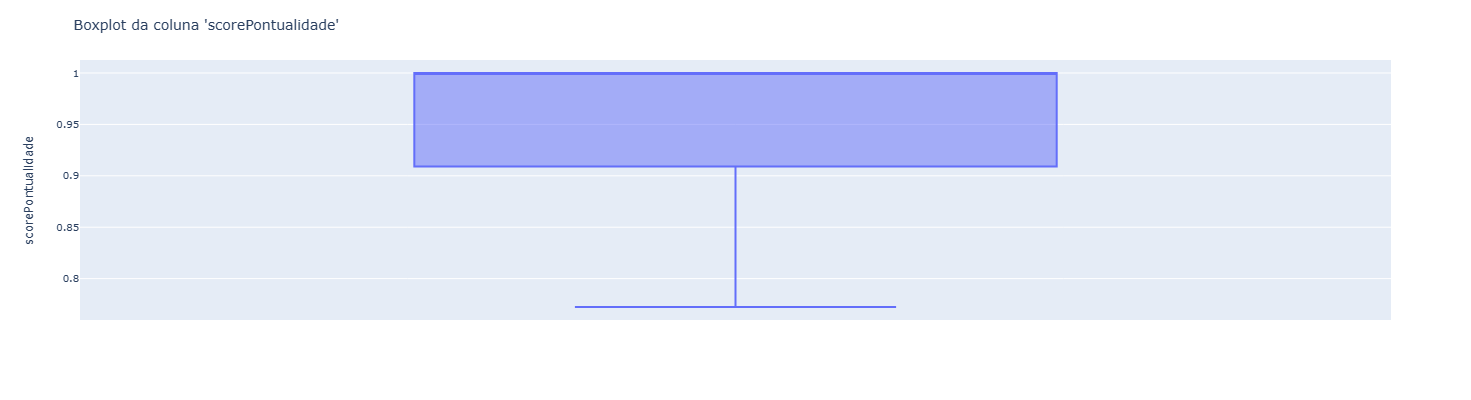

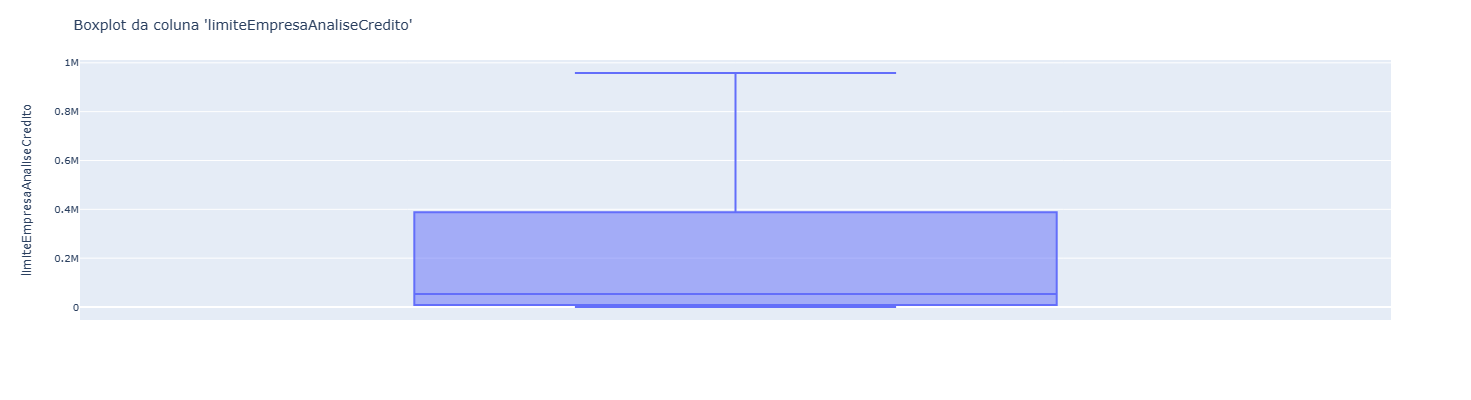

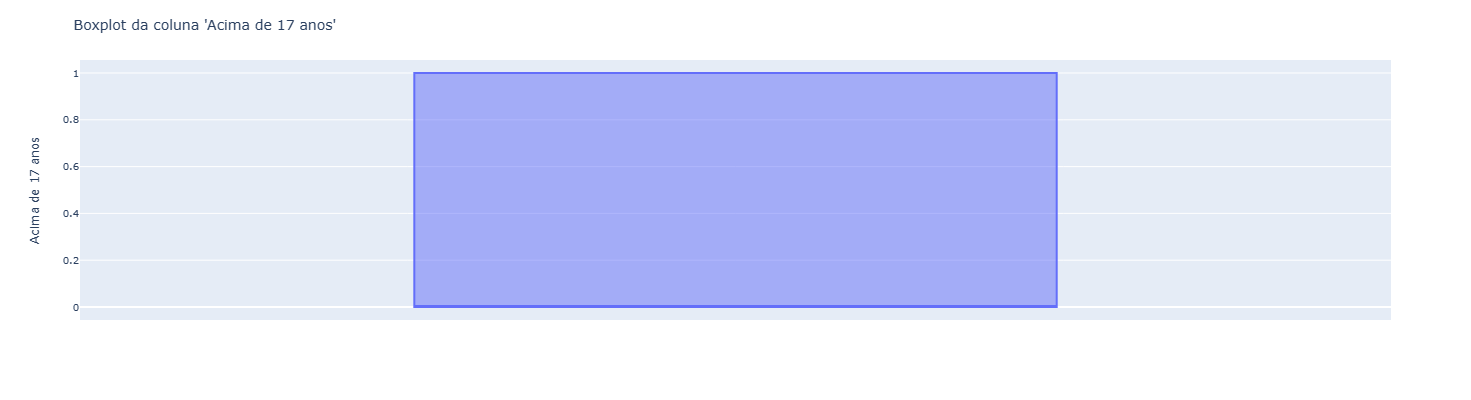

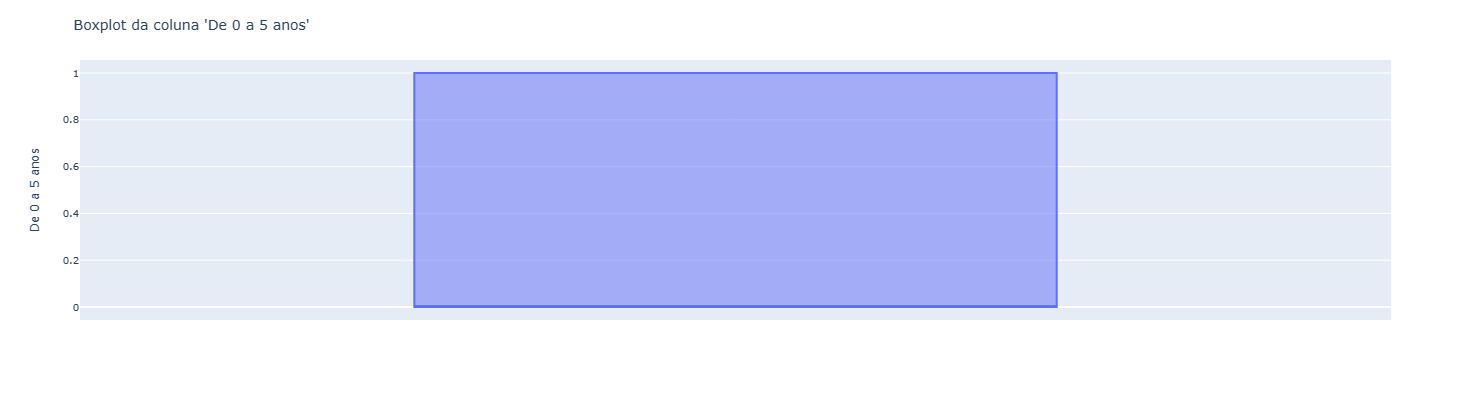

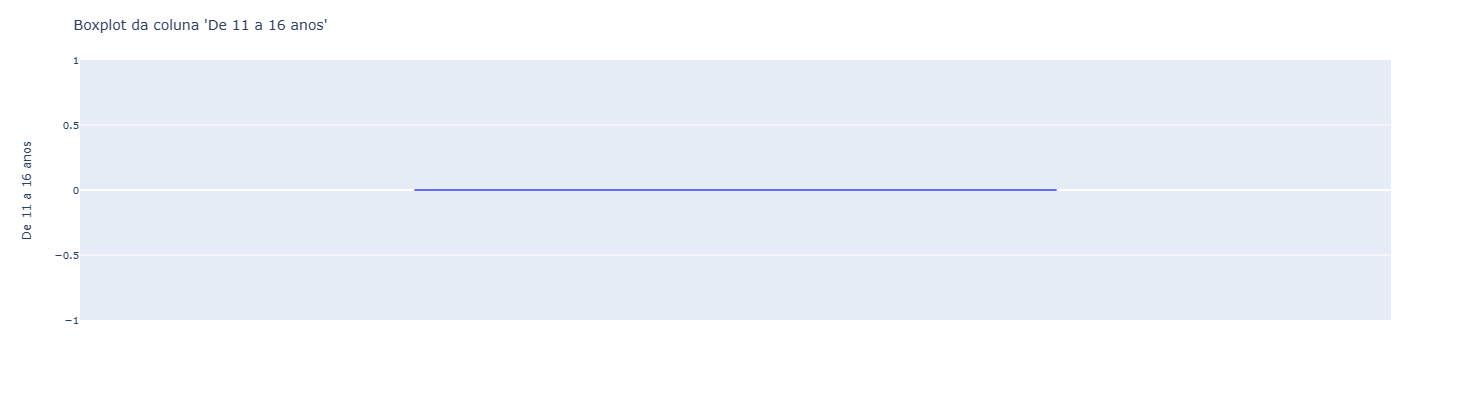

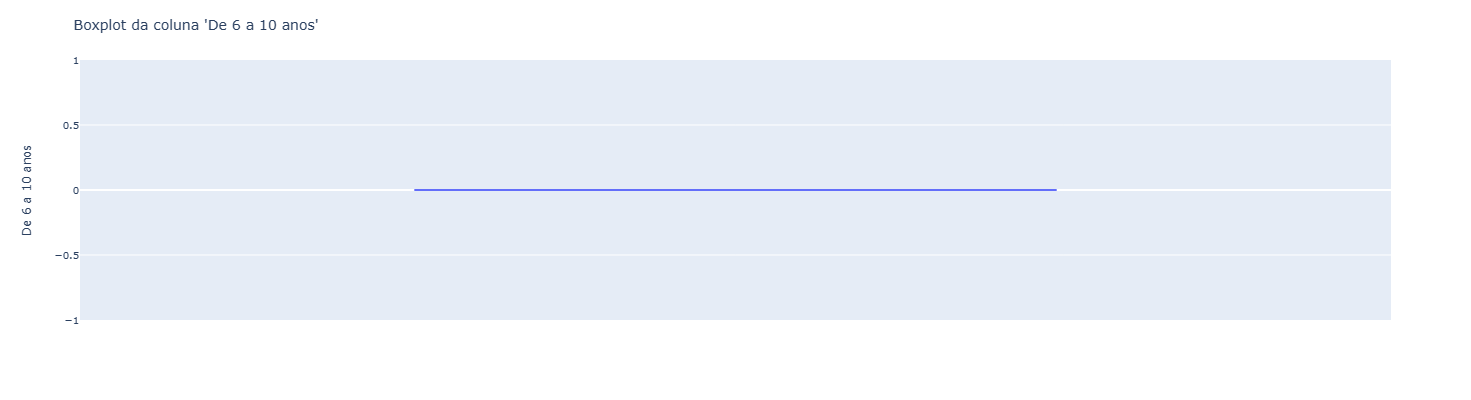

In [114]:
for column in data.columns:
    # Cria um boxplot para a coluna atual
    fig = px.box(data_frame=data, y=column, labels={'y': column})
    fig.update_layout(
        title=f"Boxplot da coluna '{column}'",
        yaxis_title=f"{column}",
        height=400,
        width=400,
        font=dict(size=10)
    )
    fig.show()

In [112]:
def rm_outliers(data):
    df1 = data.copy()
    
    for col in data.columns:
        # q1 = the first quartile | q3 = the third quartile | q2 = interquartile range
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        q2 = q3 - q1
        
        # setting the areas = lower and upper bounds equals the median times 1.5
        lower_bound = q1 - (1.5 * q2)
        upper_bound = q3 + (1.5 * q2)
        
        # if the data in each column that has outliers were below the lower bound then it will set it to the lower bound area. Same with upper bound.
        df1[col] = df1[col].apply(lambda x: lower_bound if x < lower_bound else x)
        df1[col] = df1[col].apply(lambda x: upper_bound if x > upper_bound else x)
    
    return df1

In [113]:
data = rm_outliers(data)

### **Droping some data and filling null values**

In [115]:
#faturamentoBruto                  4
#margemBruta                       4
#periodoDemonstrativoEmMeses       4
#custos                            4

cols = ['faturamentoBruto', 'margemBruta', 'periodoDemonstrativoEmMeses', 'custos']

is_null = data[cols].isnull().all(axis=1)

data[is_null]

maiorAtraso  margemBrutaAcumulada  prazoMedioRecebimentoVendas  \
2428          6.0              0.431522                         42.0   
4314          4.0              0.507417                          0.0   
6866          0.0              0.361843                          0.0   
8781         11.0              0.353252                         10.0   

      titulosEmAberto  valorSolicitado  status  definicaoRisco  \
2428         41017.32         120000.0     6.0               3   
4314             0.00         287500.0     6.0               3   
6866          3051.00          50000.0     6.0               2   
8781         45900.00         250000.0     6.0               3   

      diferencaPercentualRisco  percentualRisco  dashboardCorrelacao  \
2428                  0.535714         0.464286                  0.0   
4314                  0.660714         0.339286                  0.0   
6866                  0.696429         0.303571                  0.0   
8781                  0.535714         0.464286                  0.0   

      valorAprovado  ativoCirculante  passivoCirculante  totalAtivo  \
2428       100000.0        1755916.0          1506236.0   1843983.0   
4314       227350.0       12951488.0         17497243.0  17587509.0   
6866        40000.0              NaN                NaN         NaN   
8781       150000.0              NaN                NaN         NaN   

      totalPatrimonioLiquido  endividamento  duplicatasAReceber    estoque  \
2428                -37573.0       311000.0            847958.0   685781.0   
4314                -46604.0       203556.0                 0.0  9471366.0   
6866                     NaN            NaN                 NaN        NaN   
8781                     NaN            NaN                 NaN        NaN   

      faturamentoBruto  margemBruta  periodoDemonstrativoEmMeses  custos  \
2428               NaN          NaN                          NaN     NaN   
4314               NaN          NaN                          NaN     NaN   
6866               NaN          NaN                          NaN     NaN   
8781               NaN          NaN                          NaN     NaN   

      anoFundacao  capitalSocial  restricoes  empresa_MeEppMei  \
2428       2016.0       850000.0         0.0                 0   
4314       1996.0        95400.0         0.0                 1   
6866       2013.0        67800.0         0.0                 1   
8781       2018.0        10000.0         0.0                 1   

      scorePontualidade  limiteEmpresaAnaliseCredito  Acima de 17 anos  \
2428           0.821072                      72600.0                 0   
4314           1.000000                      17200.0                 1   
6866           1.000000                     123426.0                 0   
8781           1.000000                          0.0                 0   

      De 0 a 5 anos  De 11 a 16 anos  De 6 a 10 anos  
2428              1              0.0             0.0  
4314              0              0.0             0.0  
6866              0              0.0             0.0  
8781              1              0.0             0.0

In [116]:
data = data.dropna(subset=['faturamentoBruto'])
data['periodoDemonstrativoEmMeses'] = data['periodoDemonstrativoEmMeses'].astype(int)
data['anoFundacao'] = data['anoFundacao'].astype(int)

In [117]:
#ativoCirculante                3179
#passivoCirculante              3179
#totalAtivo                     3179
#totalPatrimonioLiquido         3179
#endividamento                  3179
#duplicatasAReceber             3179
#estoque                        3179

def fill_median(d, col):
    d.loc[d[col].isnull(), col] = d[col].median()

In [118]:
for col in data.columns:
  if data[col].isnull().sum() > 0:
    fill_median(data, col)

In [119]:
data

maiorAtraso  margemBrutaAcumulada  prazoMedioRecebimentoVendas  \
0             0.0              0.252448                          0.0   
2             4.0              0.624777                          0.0   
3            20.0              0.000000                          0.0   
4            20.0              0.454088                         20.0   
5             0.0              0.000000                          0.0   
...           ...                   ...                          ...   
8956         18.0              0.000000                          0.0   
8957          4.0              0.194429                          0.0   
8958          4.0              0.536739                         28.0   
8960          0.0              0.462250                          0.0   
8961         50.5              0.426652                         64.0   

      titulosEmAberto  valorSolicitado  status  definicaoRisco  \
0                0.00          50000.0     6.0               2   
2                0.00          20000.0     6.0               2   
3                0.00          25000.0     6.0               4   
4             1486.95          50000.0     6.0               2   
5                0.00          25000.0     6.0               3   
...               ...              ...     ...             ...   
8956             0.00          50000.0     6.0               2   
8957             0.00         200000.0     6.0               3   
8958          6804.00         287500.0     6.0               2   
8960             0.00          20000.0     6.0               2   
8961         45900.00         287500.0     6.0               2   

      diferencaPercentualRisco  percentualRisco  dashboardCorrelacao  \
0                     0.716981         0.283019                  0.0   
2                     0.716981         0.283019                  0.0   
3                     0.396226         0.603774                  0.0   
4                     0.830189         0.169811                  0.0   
5                     0.622642         0.377358                  0.0   
...                        ...              ...                  ...   
8956                  0.785714         0.214286                  0.0   
8957                  0.625000         0.375000                  0.0   
8958                  0.750000         0.250000                  0.0   
8960                  0.732143         0.267857                  0.0   
8961                  0.857143         0.142857                  0.0   

      valorAprovado  ativoCirculante  passivoCirculante  totalAtivo  \
0           50000.0        4221697.0          1434378.0   4867311.0   
2           20000.0        4221697.0          1434378.0   4867311.0   
3           15000.0        4221697.0          1434378.0   4867311.0   
4           50000.0       14758917.0         12149031.0  25793410.0   
5           20000.0        4221697.0          1434378.0   4867311.0   
...             ...              ...                ...         ...   
8956        45000.0        4221697.0          1434378.0   4867311.0   
8957        15000.0        2230968.0            13885.0   2336218.0   
8958       227350.0       20070708.0         18164050.0  20290799.0   
8960        20000.0              0.0                0.0         0.0   
8961       227350.0       38305921.0         15063464.0  40876769.0   

      totalPatrimonioLiquido  endividamento  duplicatasAReceber       estoque  \
0               1.678506e+06         1780.0           1161538.0  1.136928e+06   
2               1.678506e+06         1780.0           1161538.0  1.136928e+06   
3               1.678506e+06         1780.0           1161538.0  1.136928e+06   
4               1.454438e+07      2018827.5          11797928.0  3.047791e+06   
5               1.678506e+06         1780.0           1161538.0  1.136928e+06   
...                      ...            ...                 ...           ...   
8956            1.678506e+06         1780.0           1161538.0

### **Checking Normality**

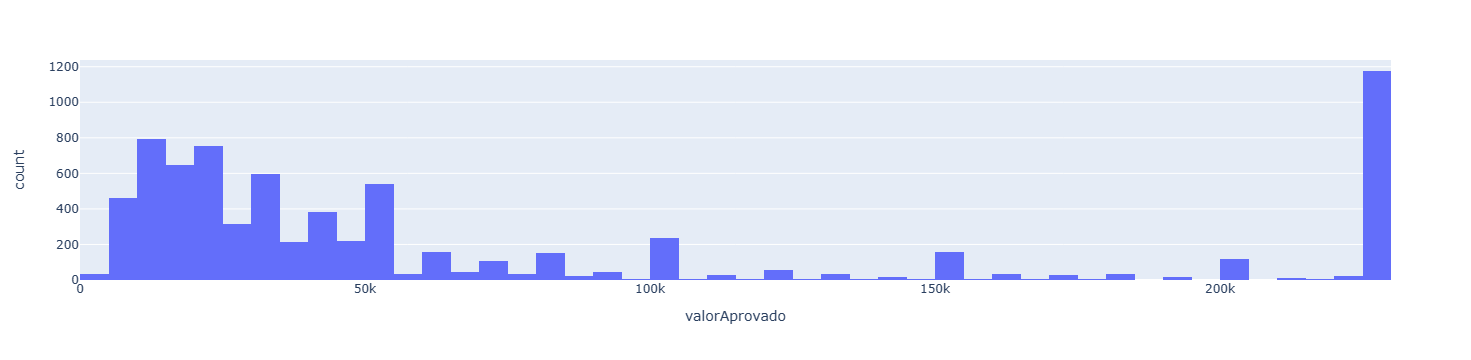

In [120]:
#plot valorAprovado checando distribuição
fig = px.histogram(data, x='valorAprovado')
fig.show()

In [121]:
# realiza o teste de Shapiro-Wilk
stat, p = shapiro(data)

# verifica o resultado do teste
alpha = 0.05
if p > alpha:
    print('Amostra segue uma distribuição normal (falha em rejeitar H0)')
else:
    print('Amostra não segue uma distribuição normal (rejeita H0)')

Amostra não segue uma distribuição normal (rejeita H0)


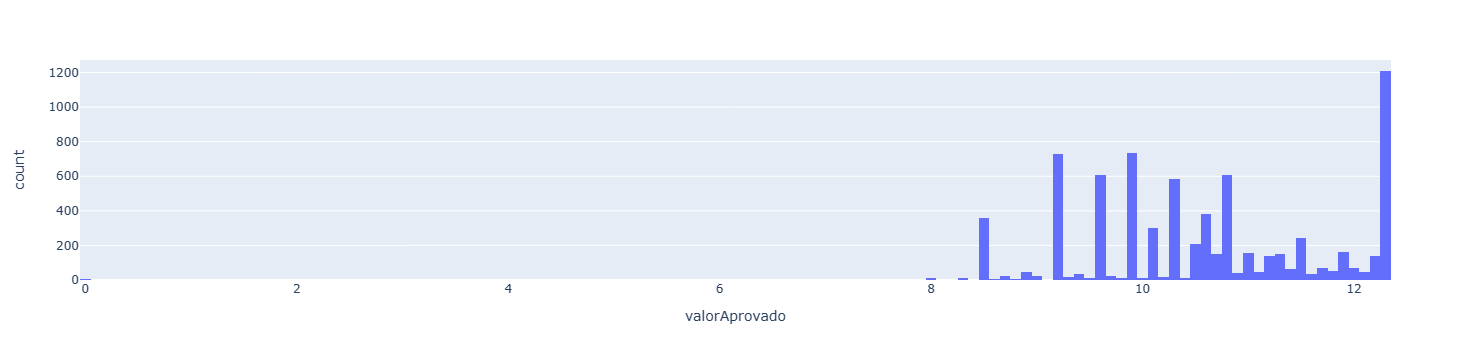

In [122]:
data['valorAprovado'] = np.log1p(data['valorAprovado'])

fig = px.histogram(data, x='valorAprovado')
fig.show()

### **Correlation + Mutual Info Regression**

In [123]:
corr = data.corr()
corr_rank = corr["valorAprovado"].sort_values(ascending = False)
corr_rank

valorAprovado                  1.000000
valorSolicitado                0.819943
custos                         0.614967
margemBruta                    0.605267
faturamentoBruto               0.555302
titulosEmAberto                0.516425
limiteEmpresaAnaliseCredito    0.498202
ativoCirculante                0.494412
estoque                        0.491539
totalAtivo                     0.486052
duplicatasAReceber             0.480150
passivoCirculante              0.470995
totalPatrimonioLiquido         0.462553
capitalSocial                  0.455274
endividamento                  0.414065
diferencaPercentualRisco       0.375580
prazoMedioRecebimentoVendas    0.253933
maiorAtraso                    0.190111
Acima de 17 anos               0.152601
scorePontualidade             -0.018886
margemBrutaAcumulada          -0.045488
periodoDemonstrativoEmMeses   -0.083972
empresa_MeEppMei              -0.179004
De 0 a 5 anos                 -0.208032
anoFundacao                   -0.217032


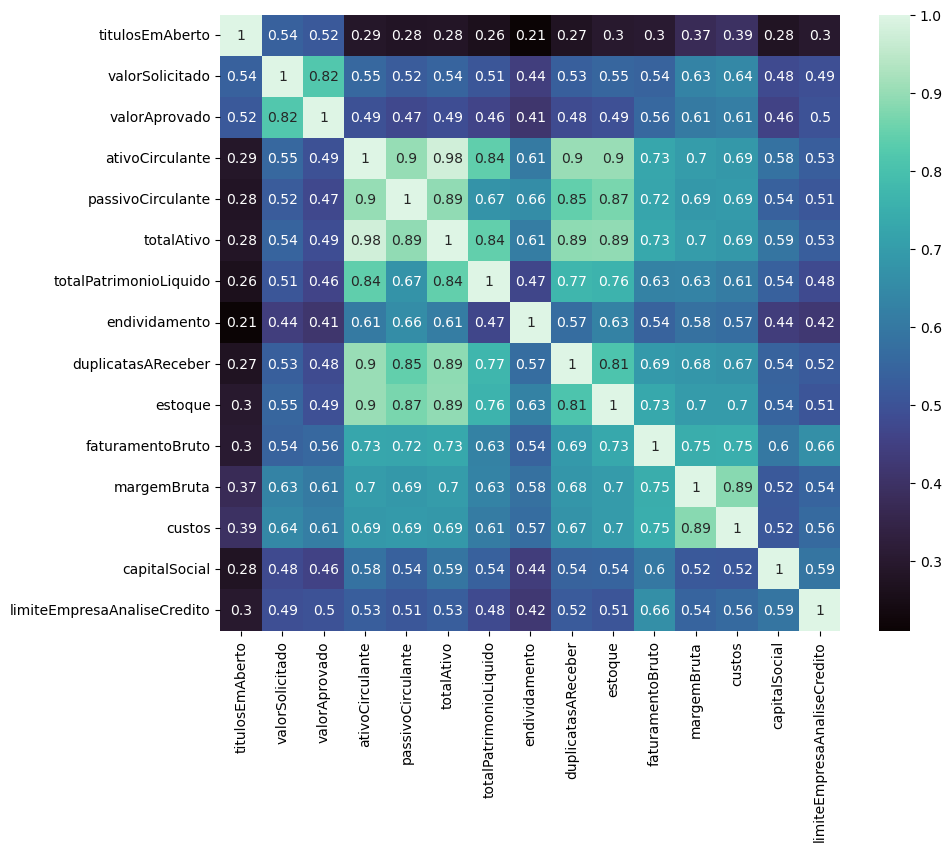

In [124]:
# Top correlations(features)
top_features = corr.index[abs(corr["valorAprovado"]>0.40)]
plt.figure(figsize = (10,8))
heat_map = sns.heatmap(data[top_features].corr(), annot=True, cmap="mako")

<AxesSubplot:>

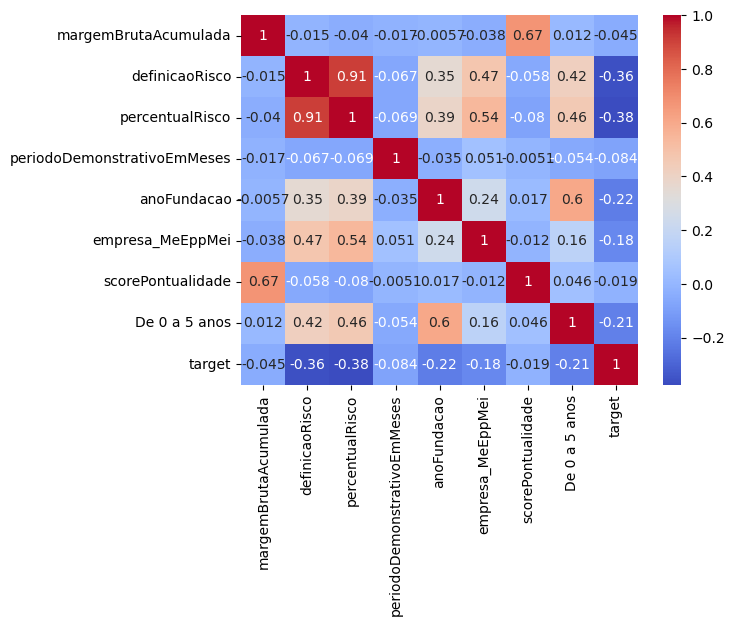

In [125]:
# Negative correlations(features)
corr_cols = data.corr()['valorAprovado'][data.corr()['valorAprovado'] < 0].index.tolist()

# Calcular a matriz de correlação
corr = data[corr_cols].corr()

data['target'] = data['valorAprovado']

# Incluir a coluna target na matriz de correlação
corr_cols.append('target')
corr = data[corr_cols].corr()

# Plotar o mapa de calor
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [126]:
data.drop('target', axis=1, inplace=True)

In [127]:
# mutual information regression
df = data.copy()

X = df.drop("valorAprovado", axis=1)
y = df["valorAprovado"]

mutual_info = mutual_info_regression(X, y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info = mutual_info.sort_values(ascending=False)

mutual_info

valorSolicitado                1.634669
faturamentoBruto               0.614817
margemBrutaAcumulada           0.523011
totalAtivo                     0.510670
ativoCirculante                0.502659
passivoCirculante              0.478998
estoque                        0.465754
duplicatasAReceber             0.456779
totalPatrimonioLiquido         0.452929
custos                         0.420897
margemBruta                    0.393202
titulosEmAberto                0.370528
limiteEmpresaAnaliseCredito    0.356648
endividamento                  0.275343
capitalSocial                  0.261506
diferencaPercentualRisco       0.173597
percentualRisco                0.173225
scorePontualidade              0.164002
prazoMedioRecebimentoVendas    0.163100
anoFundacao                    0.134418
maiorAtraso                    0.129510
definicaoRisco                 0.099733
periodoDemonstrativoEmMeses    0.037386
De 0 a 5 anos                  0.026211
empresa_MeEppMei               0.019015


In [128]:
data

maiorAtraso  margemBrutaAcumulada  prazoMedioRecebimentoVendas  \
0             0.0              0.252448                          0.0   
2             4.0              0.624777                          0.0   
3            20.0              0.000000                          0.0   
4            20.0              0.454088                         20.0   
5             0.0              0.000000                          0.0   
...           ...                   ...                          ...   
8956         18.0              0.000000                          0.0   
8957          4.0              0.194429                          0.0   
8958          4.0              0.536739                         28.0   
8960          0.0              0.462250                          0.0   
8961         50.5              0.426652                         64.0   

      titulosEmAberto  valorSolicitado  status  definicaoRisco  \
0                0.00          50000.0     6.0               2   
2                0.00          20000.0     6.0               2   
3                0.00          25000.0     6.0               4   
4             1486.95          50000.0     6.0               2   
5                0.00          25000.0     6.0               3   
...               ...              ...     ...             ...   
8956             0.00          50000.0     6.0               2   
8957             0.00         200000.0     6.0               3   
8958          6804.00         287500.0     6.0               2   
8960             0.00          20000.0     6.0               2   
8961         45900.00         287500.0     6.0               2   

      diferencaPercentualRisco  percentualRisco  dashboardCorrelacao  \
0                     0.716981         0.283019                  0.0   
2                     0.716981         0.283019                  0.0   
3                     0.396226         0.603774                  0.0   
4                     0.830189         0.169811                  0.0   
5                     0.622642         0.377358                  0.0   
...                        ...              ...                  ...   
8956                  0.785714         0.214286                  0.0   
8957                  0.625000         0.375000                  0.0   
8958                  0.750000         0.250000                  0.0   
8960                  0.732143         0.267857                  0.0   
8961                  0.857143         0.142857                  0.0   

      valorAprovado  ativoCirculante  passivoCirculante  totalAtivo  \
0         10.819798        4221697.0          1434378.0   4867311.0   
2          9.903538        4221697.0          1434378.0   4867311.0   
3          9.615872        4221697.0          1434378.0   4867311.0   
4         10.819798       14758917.0         12149031.0  25793410.0   
5          9.903538        4221697.0          1434378.0   4867311.0   
...             ...              ...                ...         ...   
8956      10.714440        4221697.0          1434378.0   4867311.0   
8957       9.615872        2230968.0            13885.0   2336218.0   
8958      12.334250       20070708.0         18164050.0  20290799.0   
8960       9.903538              0.0                0.0         0.0   
8961      12.334250       38305921.0         15063464.0  40876769.0   

      totalPatrimonioLiquido  endividamento  duplicatasAReceber       estoque  \
0               1.678506e+06         1780.0           1161538.0  1.136928e+06   
2               1.678506e+06         1780.0           1161538.0  1.136928e+06   
3               1.678506e+06         1780.0           1161538.0  1.136928e+06   
4               1.454438e+07      2018827.5          11797928.0  3.047791e+06   
5               1.678506e+06         1780.0           1161538.0  1.136928e+06   
...                      ...            ...                 ...           ...   
8956            1.678506e+06         1780.0           1161538.0

### **Model**

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Separando as features e o target
X = data.drop('valorAprovado', axis=1)
y = data['valorAprovado']

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo os modelos
models = {'Linear Regression': LinearRegression(),
          'Decision Tree': DecisionTreeRegressor(random_state=42),
          'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
          'Gradient Boosting': GradientBoostingRegressor(random_state=42),
          'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
          'AdaBoost': AdaBoostRegressor(random_state=42)}

# Treinando e avaliando cada modelo
for name, model in models.items():
    # Treinando o modelo
    model.fit(X_train, y_train)
    
    # Fazendo previsões no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Calculando o R²
    r2 = r2_score(y_test, y_pred)
    
    # Imprimindo o resultado
    print(name)
    print('R² score:', r2)

Linear Regression
R² score: 0.7508563287859309
Decision Tree
R² score: 0.7616989305248089
Random Forest
R² score: 0.8537604019316316
Gradient Boosting
R² score: 0.8617092881209828
XGBoost
R² score: 0.8144465103159685
AdaBoost
R² score: 0.6248853053435104


In [131]:
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(n_estimators=10, random_state=42)

sr = StackingRegressor(
    estimators=[('lr', lr), ('dtr', dtr), ('rfr', rfr)],
    final_estimator=LinearRegression()
)


# Treinando o modelo
sr.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = sr.predict(X_test)

# Calculando o R2
r2 = r2_score(y_test, y_pred)

print(f'R2 score: {r2:.4f}')

R2 score: 0.8595


In [135]:
best_model = max(models.items(), key=lambda x: x[1].score(X_test, y_test))[0]
best_model

'Gradient Boosting'

In [137]:
import pickle
pickle.dump(models[best_model], open('../models/model.sav', 'wb'))

In [138]:
test = X_test.iloc[0].values.reshape(1, -1)

In [139]:
model = pickle.load(open('../models/model.sav', 'rb'))
model.predict(test)

array([12.20624865])